In [62]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

#demonstrate the dataset can be read from the web into R
grades <-read_csv("StudentsPerformance.csv")

#wrangling into a tidy format

set.seed(1)
colnames(grades) <- make.names(colnames(grades))

#for standard lunches
grades_selected_standard_lunch <- grades %>%
    select (lunch, test.preparation.course, parental.level.of.education, math.score, reading.score, writing.score) %>%
    filter (lunch == "standard")


#adding average grades for standard lunch
grades_new_standard <- grades_selected_standard_lunch %>%
    mutate (average.score = (math.score + reading.score + writing.score)/3) %>%
    mutate(letter_grade =cut(average.score, breaks = c(0,50,60,70,80,100), labels =c("fail", "D", "C", "B", "A")))%>%
    mutate (letter_grade = as_factor(letter_grade))
    
grades_new_standard

grades_split<- initial_split(grades_new_standard, prop=0.75, strata = letter_grade)

grades_train <- training(grades_split)
grades_test <- testing(grades_split)



Parsed with column specification:
cols(
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)



lunch,test.preparation.course,parental.level.of.education,math.score,reading.score,writing.score,average.score,letter_grade
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
standard,none,bachelor's degree,72,72,74,72.66667,B
standard,completed,some college,69,90,88,82.33333,A
standard,none,master's degree,90,95,93,92.66667,A
standard,none,some college,76,78,75,76.33333,B
standard,none,associate's degree,71,83,78,77.33333,B
standard,completed,some college,88,95,92,91.66667,A
standard,none,associate's degree,58,54,52,54.66667,D
standard,none,associate's degree,40,52,43,45.00000,fail
standard,none,high school,65,81,73,73.00000,B


In [66]:
#using only training data summarize the data into one table 

grades_train_table <- grades_train %>%
        select(letter_grade)%>%
        group_by (letter_grade) %>%
        summarize (number_obs_per_class = n())

grades_train_table

#number of observations in each class.

`summarise()` ungrouping output (override with `.groups` argument)



letter_grade,number_obs_per_class
<fct>,<int>
fail,35
D,68
C,125
B,139
A,118


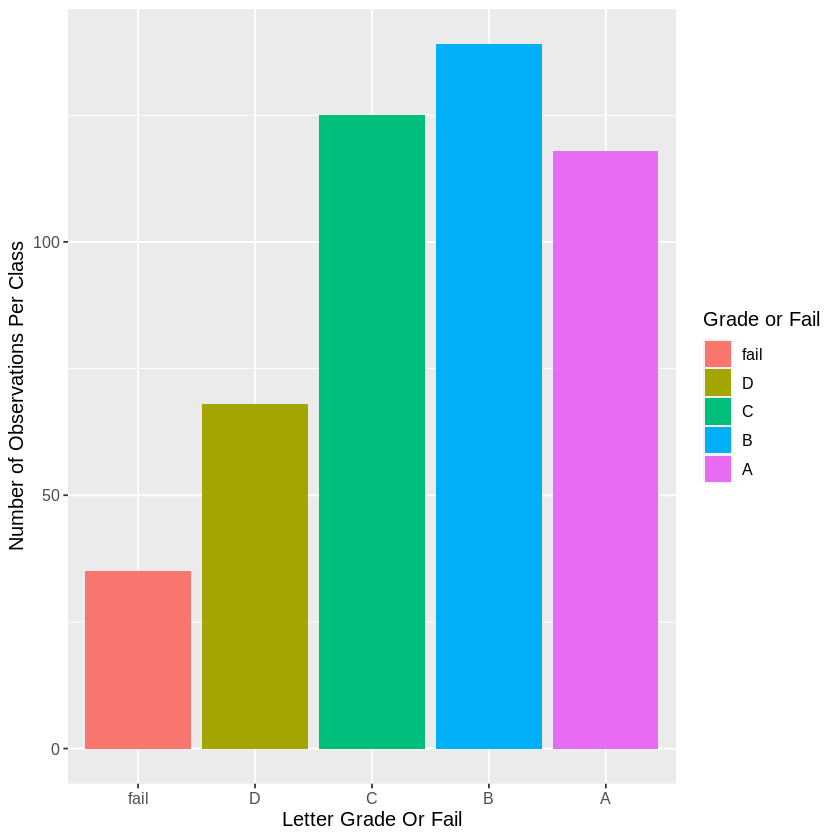

In [78]:
#using training data, visualize the data with at least one plot relevant
#to analysis you plan to do
grades_bar <- ggplot(grades_train_table, 
                      aes(x = letter_grade,
                          y = number_obs_per_class,
                         fill = letter_grade)) +
  geom_bar(stat = "identity") +
  labs(x = "Letter Grade Or Fail", y = "Number of Observations Per Class", fill = "Grade or Fail") +
  theme(text = element_text(size =12))

grades_bar